In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import tensorflow as tf
from tensorflow import keras
import re

In [2]:
all_df = pd.read_csv('./data/ratings.txt', sep='\t', engine='python',
                     encoding='UTF8')

In [3]:
train_df = pd.read_csv('./data/ratings_train.txt', sep='\t', engine='python',
                     encoding='UTF8')
test_df = pd.read_csv('./data/ratings_test.txt', sep='\t', engine='python',
                     encoding='UTF8')

In [4]:
train_df[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
print("# of test data: ", len(test_df))

# of test data:  50000


In [6]:
test_df[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [7]:
train_df['document'].nunique(), train_df['label'].nunique()

(146182, 2)

In [8]:
train_df['document'].unique().shape

(146183,)

In [9]:
# remove duplicated data
train_df.drop_duplicates(subset=['document'], inplace=True)

In [10]:
print("# of train data: ", len(train_df))

# of train data:  146183


<Axes: xlabel='label'>

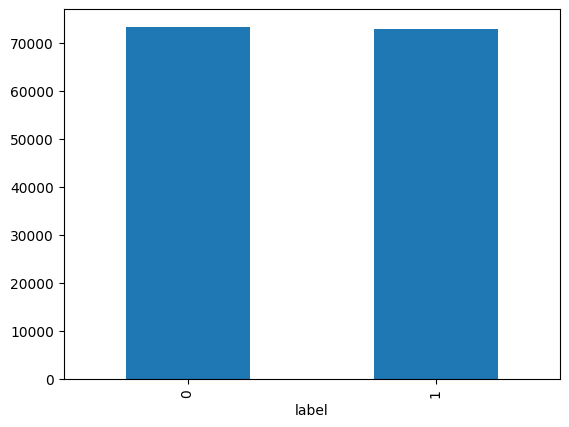

In [11]:
train_df['label'].value_counts().plot(kind='bar')

In [12]:
print(train_df.groupby('label').size().reset_index(name='count'))

   label  count
0      0  73342
1      1  72841


In [13]:
print(train_df.isnull().values.any())

True


In [14]:
print(train_df.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [15]:
train_df.loc[train_df.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [16]:
train_df = train_df.dropna(how = 'any').reset_index(drop=True)

In [17]:
print(train_df.isnull().values.any())

False


In [18]:
def remove_special_characters(text):
    cleaned_text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', text)
    return cleaned_text
train_df['document'] = train_df['document'].apply(remove_special_characters)
# 아니면 train_df['document'] = train_df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣\s]", "", regex=True)
# 로 해도 됨

In [19]:
train_df

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...,...
146177,6222902,인간이 문제지 소는 뭔죄인가,0
146178,8549745,평점이 너무 낮아서,1
146179,9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
146180,2376369,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [20]:
train_df['document'] = train_df['document'].str.replace('^ +', "", regex=True)
train_df['document'].replace('', np.nan, inplace=True)
print(train_df.isnull().sum())

id            0
document    789
label         0
dtype: int64


In [21]:
train_df.loc[train_df.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [22]:
train_df = train_df.dropna(how='any')

In [23]:
print(len(train_df))

145393


In [24]:
train_df[train_df.document.isnull()]

,id,document,label


In [25]:
test_df.drop_duplicates(subset=['document'], inplace=True)
test_df.dropna(how='any', inplace=True)
test_df['document'] = test_df['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '',
                                                      regex=True)
test_df['document'] = test_df['document'].str.replace('^ +', "", regex=True)
test_df['document'].replace('', np.nan, inplace=True)
test_df = test_df.dropna(how='any')
print('# of test data after preprocessing: ', len(test_df))

# of test data after preprocessing:  48852


https://bab2min.tistory.com/544
해당 블로그를 참고하여 불용어를 선택했다.

In [26]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍',
             '과','도','를','으로','자','에','와','한','하다',
             '것', '그', '되', '수', '보', '주', '등','우리']

In [27]:
from konlpy.tag import Okt

In [28]:
okt = Okt()
okt.morphs('오 많이 신기한걸 형태소 분석을 자동으로 해주다니', stem=True)

['오', '많이', '신기하다', '걸', '형태소', '분석', '을', '자동', '으로', '해주다']

In [29]:
okt.morphs('너와 나는 친구이다', stem=True)

['너', '와', '나', '는', '친구', '이다']

In [30]:
from tqdm import tqdm

In [31]:
X_train = []
for sentence in tqdm(train_df['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence
                                  if not word in stopwords]
    X_train.append(stopwords_removed_sentence)

100%|██████████| 145393/145393 [06:46<00:00, 357.70it/s]


In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
print(X_train[:3])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [34]:
X_test = []
for sentence in tqdm(test_df['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence
                                  if not word in stopwords]
    X_test.append(stopwords_removed_sentence)

100%|██████████| 48852/48852 [01:19<00:00, 613.01it/s]


In [35]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [36]:
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '을': 3, '없다': 4, '이다': 5, '있다': 6, '좋다': 7, '너무': 8, '다': 9, '정말': 10, '되다': 11, '재밌다': 12, '적': 13, '만': 14, '같다': 15, '진짜': 16, '로': 17, '아니다': 18, '않다': 19, '점': 20, '에서': 21, '만들다': 22, '나오다': 23, '연기': 24, '평점': 25, '내': 26, '최고': 27, '나': 28, '안': 29, '인': 30, '스토리': 31, '생각': 32, '못': 33, '왜': 34, '드라마': 35, '게': 36, '감동': 37, '사람': 38, '보고': 39, '이렇다': 40, '말': 41, '고': 42, '아깝다': 43, '더': 44, '배우': 45, '때': 46, 'ㅋㅋ': 47, '아': 48, '감독': 49, '거': 50, '그냥': 51, '재미있다': 52, '요': 53, '재미': 54, '시간': 55, '내용': 56, '뭐': 57, '까지': 58, '중': 59, '주다': 60, '자다': 61, '하고': 62, '지루하다': 63, '재미없다': 64, '쓰레기': 65, '네': 66, '모르다': 67, '가다': 68, '들다': 69, '그렇다': 70, '싶다': 71, '지': 72, '작품': 73, '사랑': 74, '알다': 75, '하나': 76, '다시': 77, '마지막': 78, '볼': 79, '이건': 80, '정도': 81, '저': 82, '완전': 83, '오다': 84, 'ㅋ': 85, 'ㅠㅠ': 86, '많다': 87, '처음': 88, 'ㅋㅋㅋ': 89, '장면': 90, '액션': 91, '주인공': 92, '이렇게': 93, '안되다': 94, '걸': 95, '차다': 96, '나다': 97, '개': 98, '하': 99, '최악': 100, '돈': 101, '이야기'

In [37]:
print(len(tokenizer.word_index))

43745


In [38]:
threshold = 3
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if value < threshold:
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('size of vocabulary set: ', total_cnt)
print('# of voca that appears less than %s: %s' % (threshold - 1, rare_cnt))
print('ratio of voca that appears less than: ', (rare_cnt/total_cnt)*100)
print('ratio of voca freq that appears less than: ', (rare_freq/total_freq)*100)

size of vocabulary set:  43745
# of voca that appears less than 2: 24337
ratio of voca that appears less than:  55.63378671848211
ratio of voca freq that appears less than:  1.8929966207329163


In [39]:
vocab_size = total_cnt - rare_cnt + 1
print('size of vocavulary :', vocab_size)

size of vocavulary : 19409


In [40]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [41]:
print(X_train_seq[:5])

[[48, 449, 16, 256, 652], [926, 452, 39, 596, 1, 211, 1442, 24, 954, 668, 19], [382, 2437, 2308, 5664, 2, 218, 9], [6485, 102, 8111, 215, 54, 4, 25, 3596], [1016, 9138, 24, 826, 1, 2572, 21, 1101, 236, 14236, 1069, 250, 236]]


In [42]:
y_train = np.array(train_df['label'])
y_test = np.array(test_df['label'])

In [43]:
drop_train = [index for index,  sentence in enumerate(X_train) if len(sentence) < 1]

In [44]:
print('length of longgest sentence:', max(len(review) for review in X_train))

length of longgest sentence: 71


In [45]:
print('average length of sentences:', sum(map(len, X_train))/len(X_train))

average length of sentences: 10.876782238484658


Text(0, 0.5, 'number of samples')

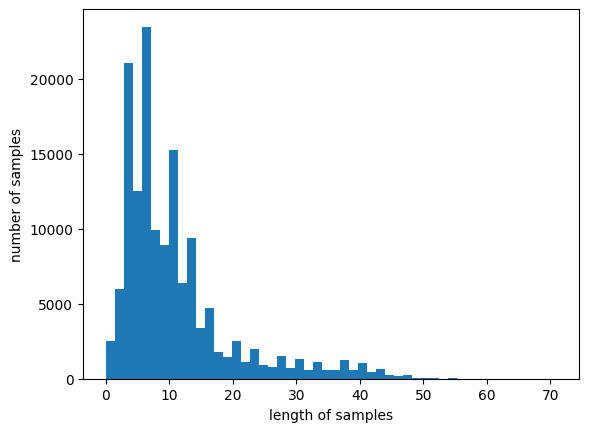

In [46]:
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

In [47]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            cnt = cnt + 1
    ratio = (cnt/len(nested_list))*100
    print('The ratio of samples that length is less than %s: %s'%(max_len, (cnt/len(nested_list))*100))
    return ratio

range(10, 110, 10)
The ratio of samples that length is less than 10: 64.60627402969882
The ratio of samples that length is less than 20: 88.42654047994057
The ratio of samples that length is less than 30: 94.51830555803924
The ratio of samples that length is less than 40: 98.57902374942398
The ratio of samples that length is less than 50: 99.94704009133865
The ratio of samples that length is less than 60: 99.9972488359137
The ratio of samples that length is less than 70: 100.0
The ratio of samples that length is less than 80: 100.0
The ratio of samples that length is less than 90: 100.0
The ratio of samples that length is less than 100: 100.0


Text(0, 0.5, 'ratio of samples')

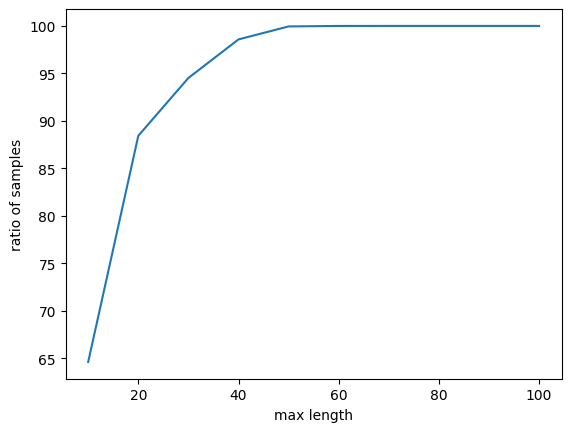

In [48]:
arr = range(10, 110, 10)
print(arr)
ratios = []

for max_len in arr:
    ratios.append(below_threshold_len(max_len, X_train_seq))

plt.plot(arr, ratios)
plt.xlabel('max length')
plt.ylabel('ratio of samples')

then, I will use 40 samples.

In [49]:
X_train_40 = pad_sequences(X_train_seq, maxlen=40, padding='post')
X_test_40 = pad_sequences(X_test_seq, maxlen=40, padding='post')

In [50]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 100))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dense(1, activation='sigmoid'))

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-sentiment-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_40, y_train, epochs=30, callbacks=[checkpoint_cb, early_stopping_cb],
                    validation_split=0.2, batch_size=64)

Epoch 1/30
1818/1818 [==============================] - 18s 8ms/step - loss: 0.4126 - accuracy: 0.8074 - val_loss: 0.3680 - val_accuracy: 0.8447
Epoch 2/30
1818/1818 [==============================] - 18s 10ms/step - loss: 0.3139 - accuracy: 0.8665 - val_loss: 0.3507 - val_accuracy: 0.8516
Epoch 3/30
1818/1818 [==============================] - 18s 10ms/step - loss: 0.2657 - accuracy: 0.8895 - val_loss: 0.3521 - val_accuracy: 0.8525
Epoch 4/30
1818/1818 [==============================] - 17s 9ms/step - loss: 0.2262 - accuracy: 0.9074 - val_loss: 0.3865 - val_accuracy: 0.8480
Epoch 5/30
1818/1818 [==============================] - 16s 9ms/step - loss: 0.1904 - accuracy: 0.9237 - val_loss: 0.4285 - val_accuracy: 0.8459


Text(0, 0.5, 'loss')

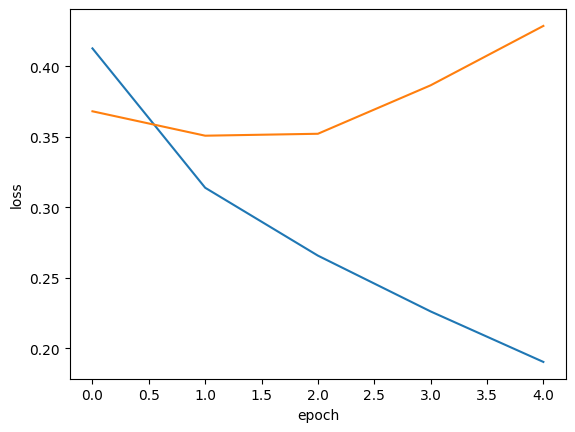

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

과대적합이 보이기 때문에 dropout을 하겠다.

In [52]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(vocab_size, 100))
model2.add(keras.layers.LSTM(128, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-sentiment-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_40, y_train, epochs=30, callbacks=[checkpoint_cb, early_stopping_cb],
                    validation_split=0.2, batch_size=64)

Epoch 1/30
1818/1818 [==============================] - 17s 8ms/step - loss: 0.4187 - accuracy: 0.8043 - val_loss: 0.3664 - val_accuracy: 0.8444
Epoch 2/30
1818/1818 [==============================] - 14s 8ms/step - loss: 0.3201 - accuracy: 0.8641 - val_loss: 0.3421 - val_accuracy: 0.8543
Epoch 3/30
1818/1818 [==============================] - 15s 8ms/step - loss: 0.2785 - accuracy: 0.8838 - val_loss: 0.3485 - val_accuracy: 0.8525
Epoch 4/30
1818/1818 [==============================] - 20s 11ms/step - loss: 0.2457 - accuracy: 0.8982 - val_loss: 0.3533 - val_accuracy: 0.8488
Epoch 5/30
1818/1818 [==============================] - 22s 12ms/step - loss: 0.2191 - accuracy: 0.9103 - val_loss: 0.3932 - val_accuracy: 0.8503


Text(0, 0.5, 'loss')

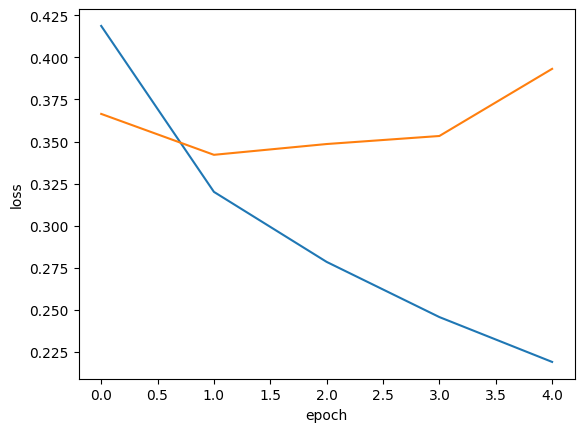

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [54]:
X_train_30 = pad_sequences(X_train_seq, maxlen=30, padding='post')
X_test_30 = pad_sequences(X_test_seq, maxlen=30, padding='post')

In [55]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(vocab_size, 100))
model3.add(keras.layers.LSTM(128, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-sentiment-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model3.fit(X_train_30, y_train, epochs=30, callbacks=[checkpoint_cb, early_stopping_cb],
                    validation_split=0.2, batch_size=64)

Epoch 1/30
1818/1818 [==============================] - 21s 11ms/step - loss: 0.4051 - accuracy: 0.8121 - val_loss: 0.3539 - val_accuracy: 0.8466
Epoch 2/30
1818/1818 [==============================] - 20s 11ms/step - loss: 0.3152 - accuracy: 0.8648 - val_loss: 0.3415 - val_accuracy: 0.8530
Epoch 3/30
1818/1818 [==============================] - 19s 11ms/step - loss: 0.2736 - accuracy: 0.8836 - val_loss: 0.3546 - val_accuracy: 0.8524
Epoch 4/30
1818/1818 [==============================] - 16s 9ms/step - loss: 0.2411 - accuracy: 0.8994 - val_loss: 0.3753 - val_accuracy: 0.8507
Epoch 5/30
1818/1818 [==============================] - 15s 8ms/step - loss: 0.2147 - accuracy: 0.9109 - val_loss: 0.4049 - val_accuracy: 0.8476


In [56]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(vocab_size, 100))
model4.add(keras.layers.LSTM(128, dropout=0.5))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-sentiment-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model4.fit(X_train_40, y_train, epochs=30, callbacks=[checkpoint_cb, early_stopping_cb],
                    validation_split=0.2, batch_size=64)

Epoch 1/30
1818/1818 [==============================] - 22s 11ms/step - loss: 0.6671 - accuracy: 0.5461 - val_loss: 0.4662 - val_accuracy: 0.7927
Epoch 2/30
1818/1818 [==============================] - 21s 11ms/step - loss: 0.3668 - accuracy: 0.8388 - val_loss: 0.3431 - val_accuracy: 0.8504
Epoch 3/30
1818/1818 [==============================] - 18s 10ms/step - loss: 0.2995 - accuracy: 0.8732 - val_loss: 0.3364 - val_accuracy: 0.8564
Epoch 4/30
1818/1818 [==============================] - 20s 11ms/step - loss: 0.2669 - accuracy: 0.8874 - val_loss: 0.3593 - val_accuracy: 0.8515
Epoch 5/30
1818/1818 [==============================] - 19s 10ms/step - loss: 0.2416 - accuracy: 0.8999 - val_loss: 0.3565 - val_accuracy: 0.8537
Epoch 6/30
1818/1818 [==============================] - 17s 9ms/step - loss: 0.2207 - accuracy: 0.9084 - val_loss: 0.3746 - val_accuracy: 0.8528


In [57]:
best_model = keras.models.load_model('best-sentiment-model.h5')
(best_model.evaluate(X_test_40, y_test))

1527/1527 [==============================] - 9s 6ms/step - loss: 0.3794 - accuracy: 0.8494


[0.37936195731163025, 0.8494022488594055]

In [58]:
model5 = keras.Sequential()
model5.add(keras.layers.Embedding(vocab_size, 100))
model5.add(keras.layers.LSTM(128, dropout=0.3))
model5.add(keras.layers.Dense(1, activation='sigmoid'))

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-sentiment-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model5.fit(X_train_40, y_train, epochs=30, callbacks=[checkpoint_cb, early_stopping_cb],
                    validation_split=0.2, batch_size=64)

Epoch 1/30
1818/1818 [==============================] - 19s 9ms/step - loss: 0.4184 - accuracy: 0.8037 - val_loss: 0.3710 - val_accuracy: 0.8420
Epoch 2/30
1818/1818 [==============================] - 18s 10ms/step - loss: 0.3200 - accuracy: 0.8637 - val_loss: 0.3427 - val_accuracy: 0.8526
Epoch 3/30
1818/1818 [==============================] - 16s 9ms/step - loss: 0.2783 - accuracy: 0.8839 - val_loss: 0.3627 - val_accuracy: 0.8504
Epoch 4/30
1818/1818 [==============================] - 16s 9ms/step - loss: 0.2454 - accuracy: 0.8969 - val_loss: 0.3661 - val_accuracy: 0.8512
Epoch 5/30
1818/1818 [==============================] - 17s 9ms/step - loss: 0.2195 - accuracy: 0.9097 - val_loss: 0.3844 - val_accuracy: 0.8488


In [59]:
best_model = keras.models.load_model('best-sentiment-model.h5')
(best_model.evaluate(X_test_40, y_test))

1527/1527 [==============================] - 10s 6ms/step - loss: 0.3891 - accuracy: 0.8458


[0.389082670211792, 0.8457790613174438]

In [62]:
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', new_sentence)
    new_sentence = okt.morphs(new_sentence, stem=True)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen=40, padding='post')
    score = float(best_model.predict(pad_new))
    if(score > 0.5):
        print("{:.2f}% positive".format(score * 100))
    else :
        print("{:.2f}% negative".format((1 - score) * 100)) 
  

In [63]:
sentiment_predict('내 리뷰 평가해봐라')

1/1 [==============================] - 2s 2s/step
56.58% negative


C:\Users\minja\AppData\Local\Temp\ipykernel_24764\3137471824.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(best_model.predict(pad_new))


In [64]:
sentiment_predict('이 영화 재미가 있지 않지 않다')

1/1 [==============================] - 0s 31ms/step
80.15% negative


C:\Users\minja\AppData\Local\Temp\ipykernel_24764\3137471824.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(best_model.predict(pad_new))


In [65]:
sentiment_predict('이 영화 재미가 있지 않다')

1/1 [==============================] - 0s 23ms/step
84.53% negative


C:\Users\minja\AppData\Local\Temp\ipykernel_24764\3137471824.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(best_model.predict(pad_new))


In [66]:
sentiment_predict('그래도 꽤 흥미로운 편')

1/1 [==============================] - 0s 32ms/step
95.99% positive


C:\Users\minja\AppData\Local\Temp\ipykernel_24764\3137471824.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(best_model.predict(pad_new))


In [67]:
sentiment_predict('망한 줄 알았는데 괜찮네')

1/1 [==============================] - 0s 30ms/step
52.64% positive


C:\Users\minja\AppData\Local\Temp\ipykernel_24764\3137471824.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(best_model.predict(pad_new))


In [68]:
sentiment_predict('나만 보게 망해라')

1/1 [==============================] - 0s 38ms/step
90.61% negative


C:\Users\minja\AppData\Local\Temp\ipykernel_24764\3137471824.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(best_model.predict(pad_new))


In [69]:
sentiment_predict('그래도 재밌네')

1/1 [==============================] - 0s 32ms/step
96.16% positive


C:\Users\minja\AppData\Local\Temp\ipykernel_24764\3137471824.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(best_model.predict(pad_new))
